# Import required data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train_phone.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.shape

(2000, 21)

In [4]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
for feature in train.columns:
    if train[feature].isnull().sum():
        print(f"No of null values in {feature} is {train[feature].isnull().sum()}")

The data is already clean and the features are also perfectly distributed so, we need not perform any wrangling or feature engineering

# Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

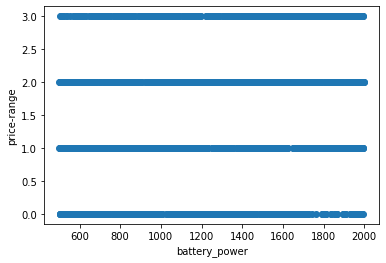

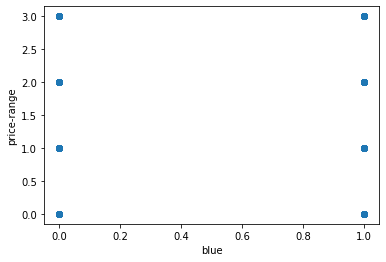

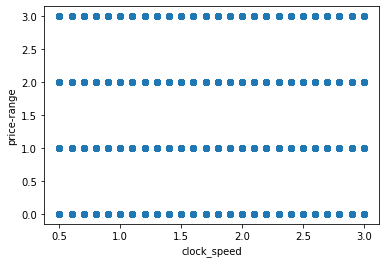

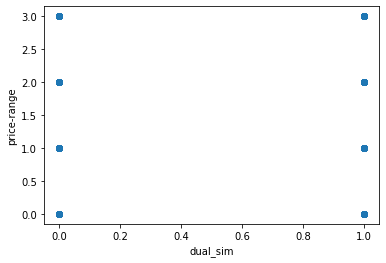

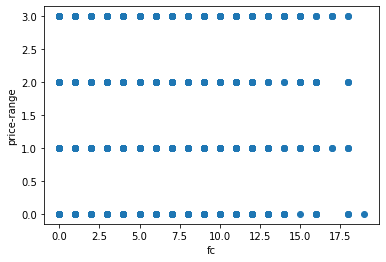

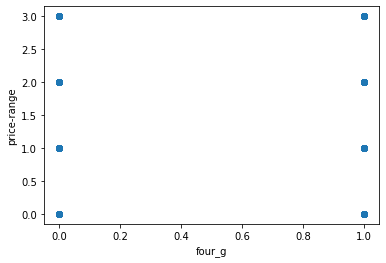

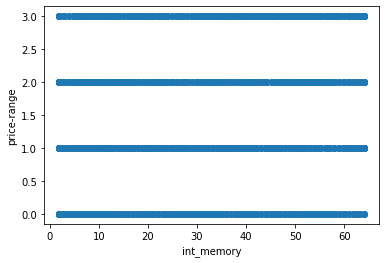

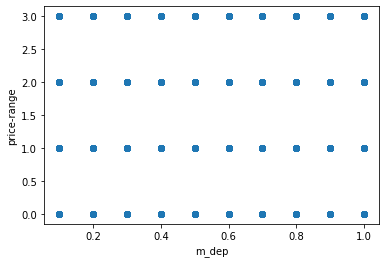

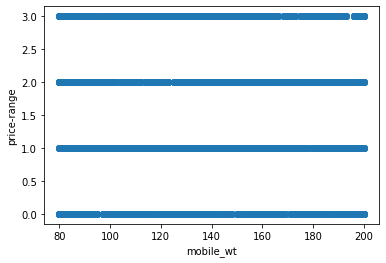

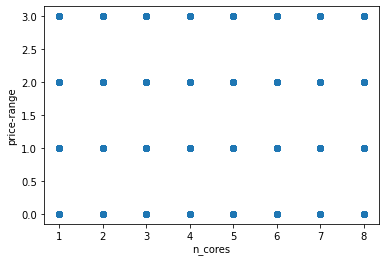

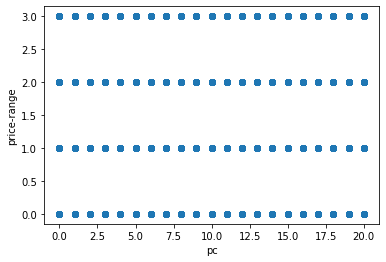

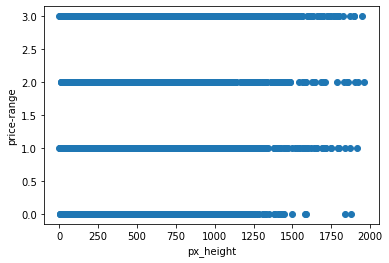

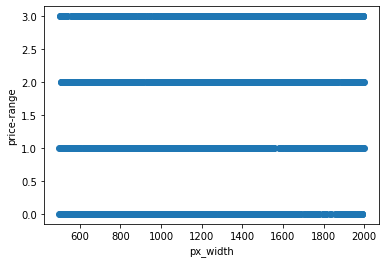

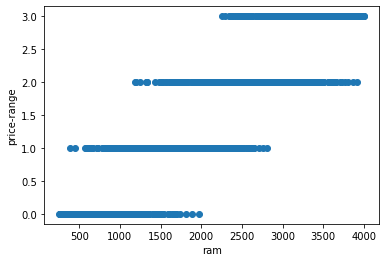

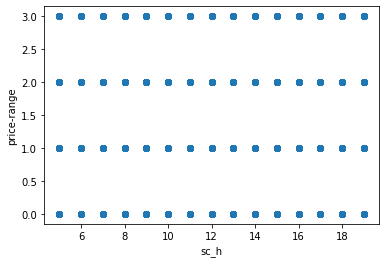

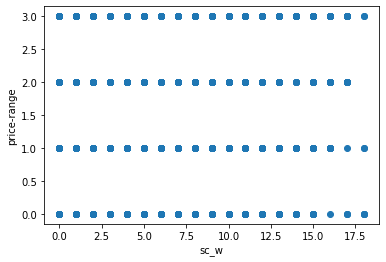

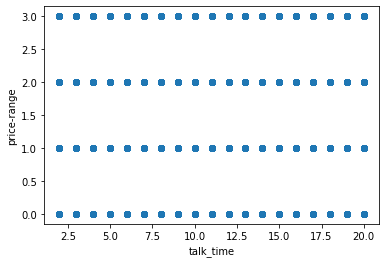

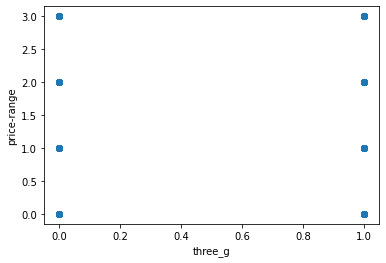

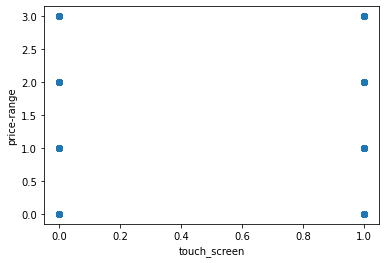

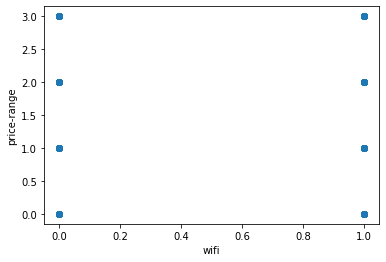

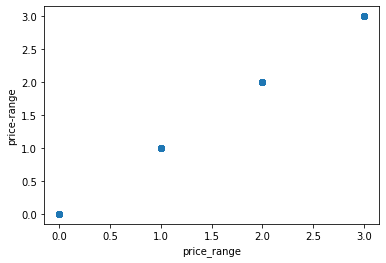

In [7]:
for feature in train.columns:
    plt.scatter(train[feature],train['price_range'])
    plt.xlabel(feature)
    plt.ylabel("price-range")
    plt.show()

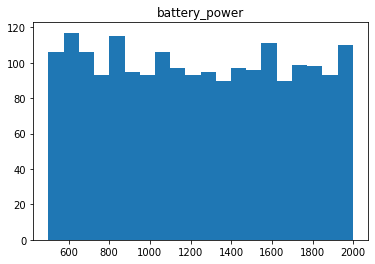

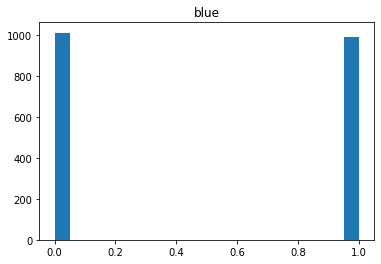

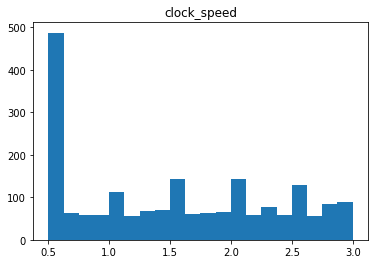

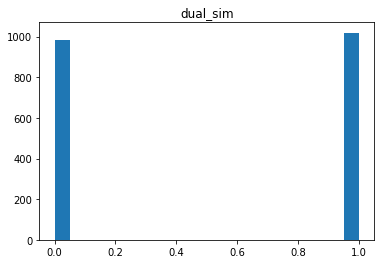

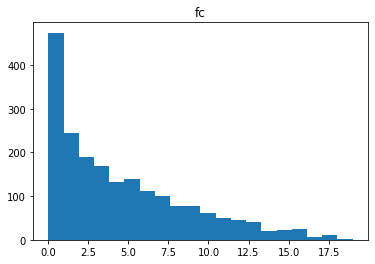

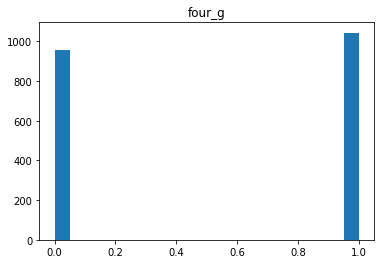

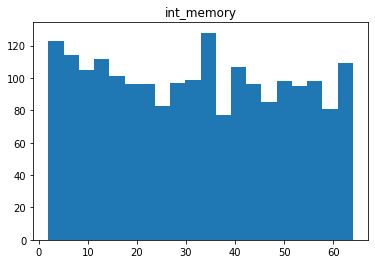

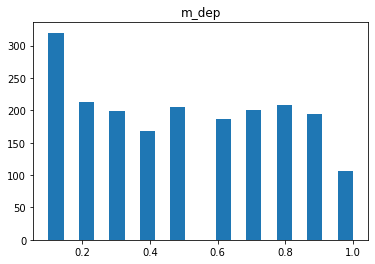

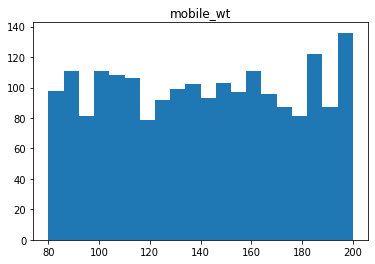

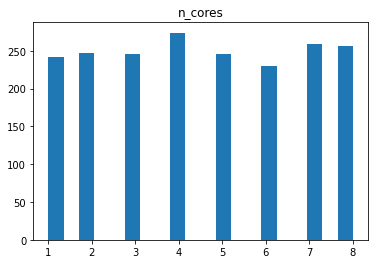

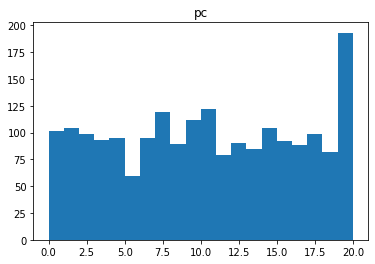

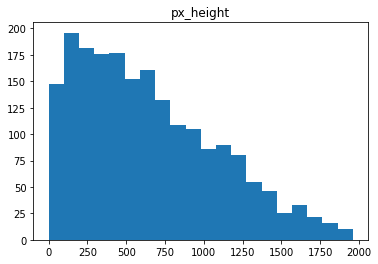

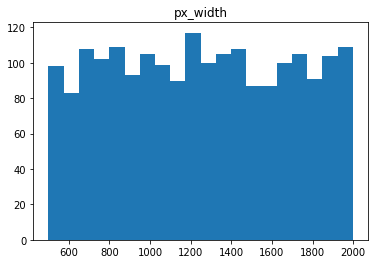

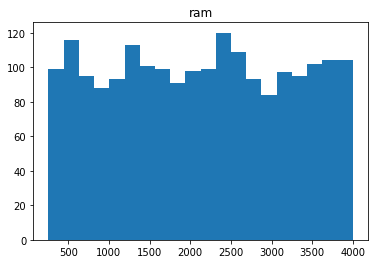

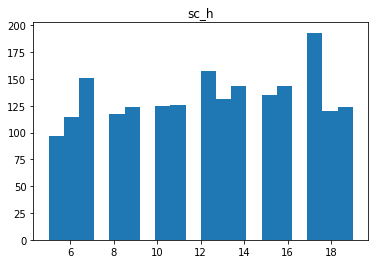

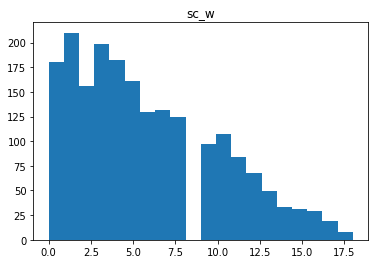

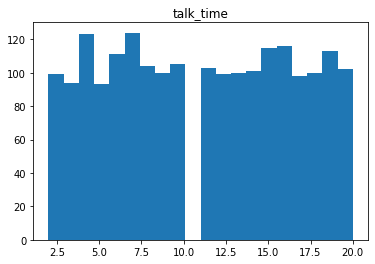

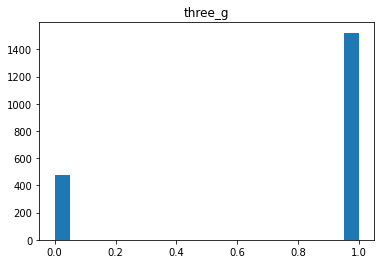

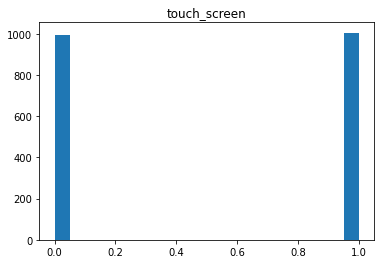

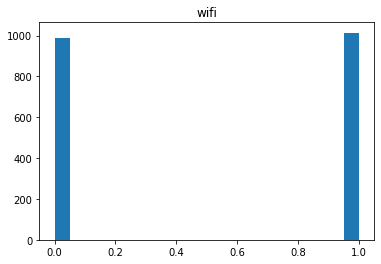

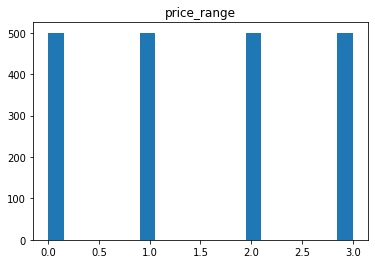

In [8]:
for feature in train.columns:
    plt.hist(train[feature],bins=20)
    plt.title(feature)
    plt.show()

In [9]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

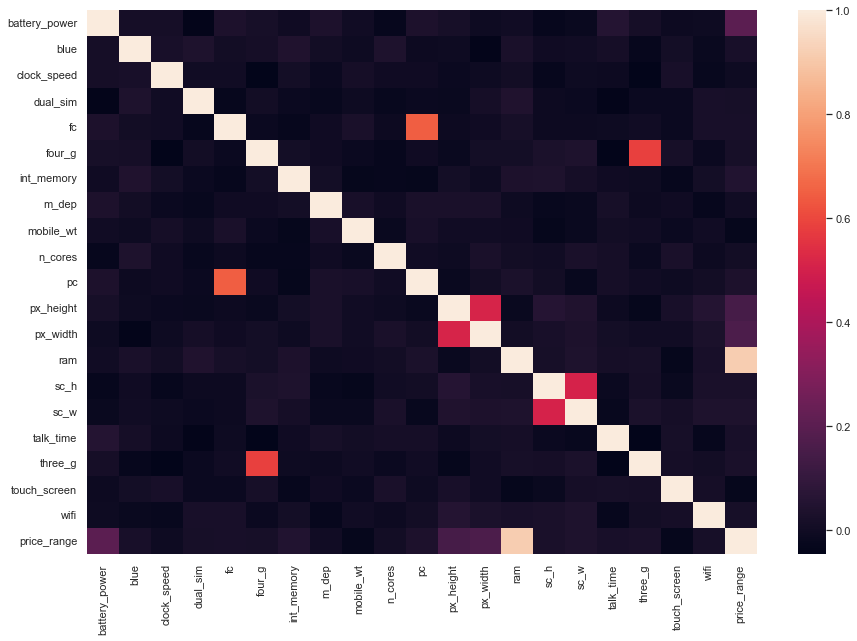

In [10]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(train.corr())

In [11]:
categorical_features = [feature for feature in train.columns if train[feature].nunique()<5]
categorical_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

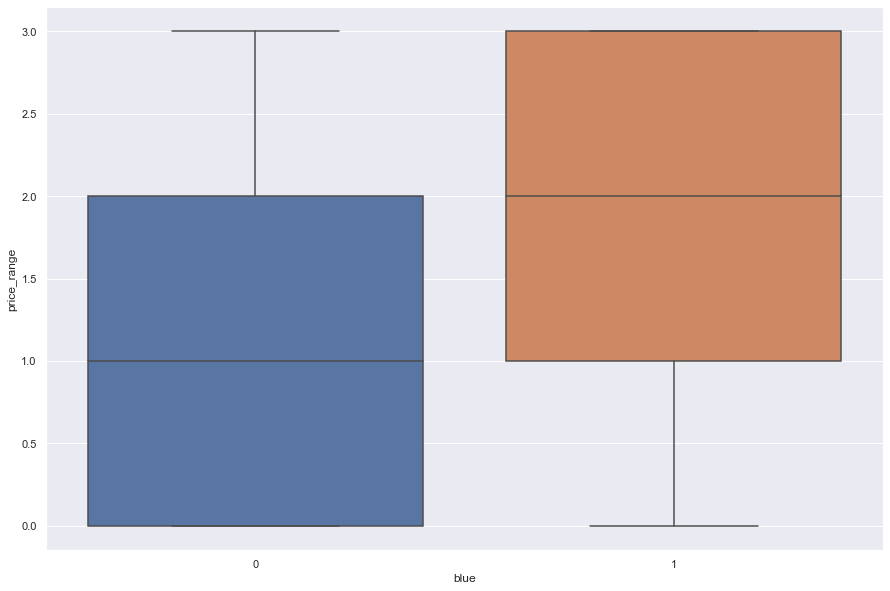

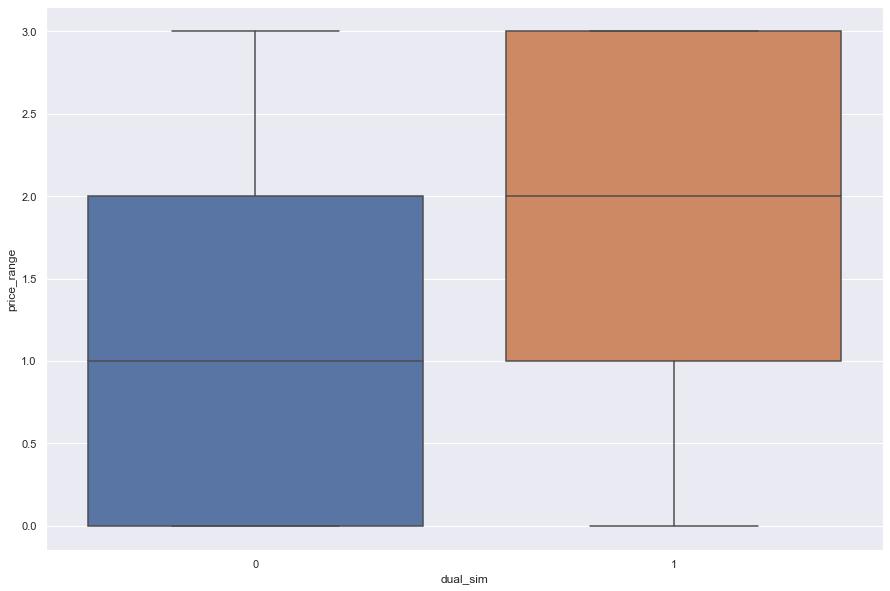

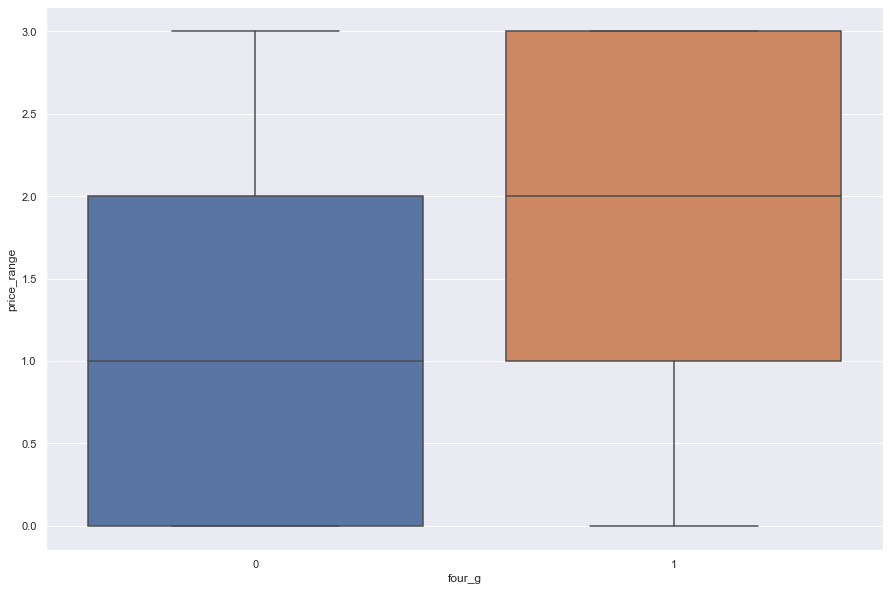

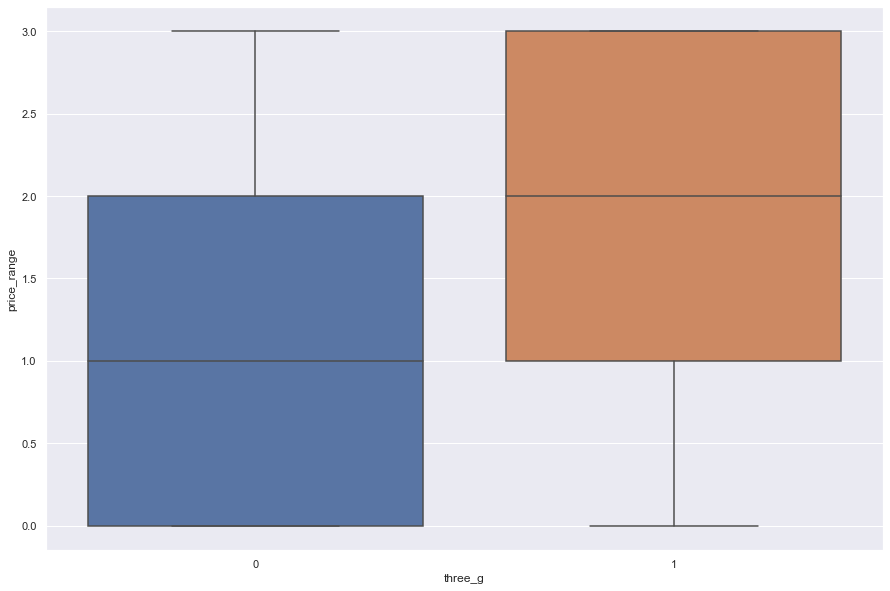

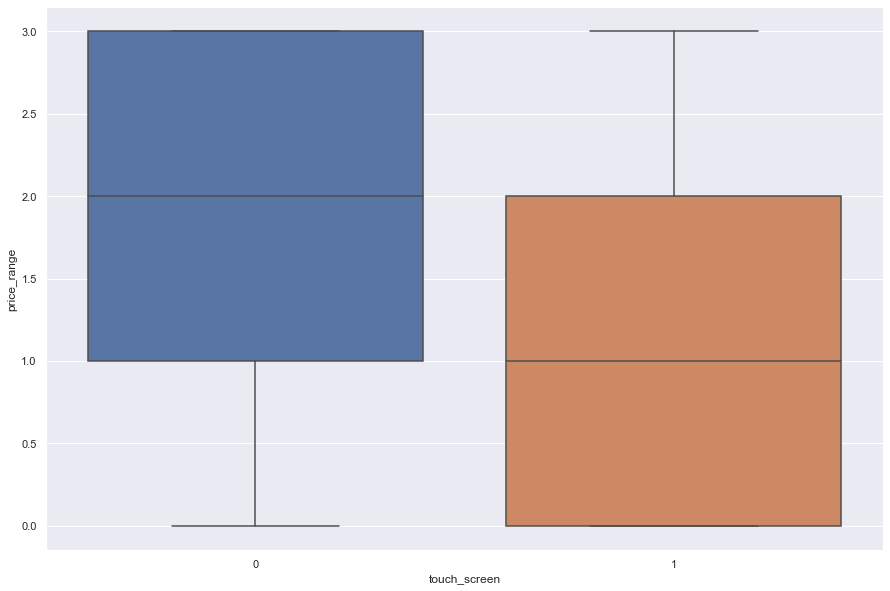

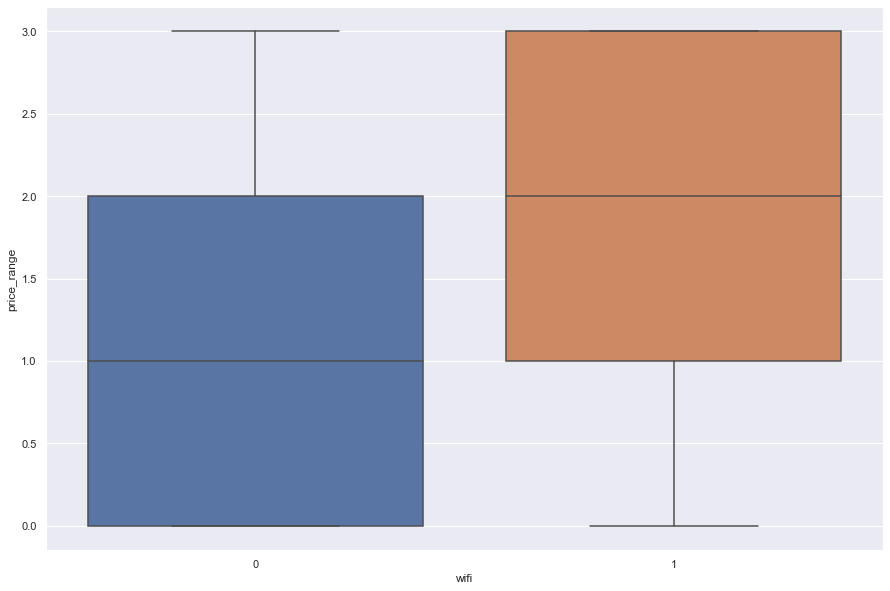

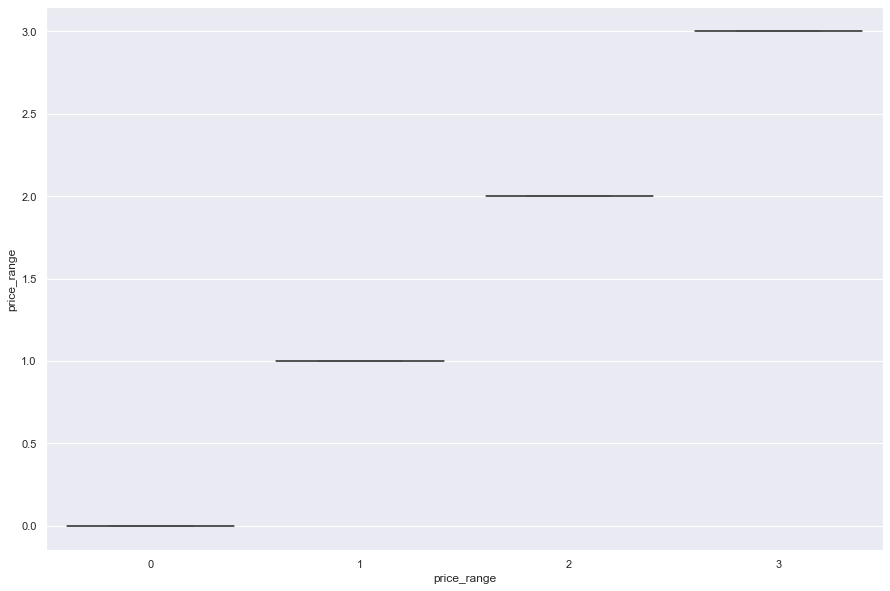

In [12]:
for feature in categorical_features:
    sns.boxplot(x=train[feature],y=train['price_range'])
    plt.show()

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop(['price_range'],axis=1),train['price_range'],test_size=0.2)

# LazyPredict

In [14]:
# import lazypredict

# Model Comparison

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
def comp_esti(esti):
    esti.fit(x_train, y_train)
    esti_test_preds = esti.predict(x_test)
    
    print(f"{esti} Accuracy score: ", accuracy_score(y_test, esti_test_preds))
    print(f"\n{esti} Classification report:\n", classification_report(y_test, esti_test_preds, digits=6))
    
    # confusion matrix
    cf_mat = confusion_matrix(y_test, esti_test_preds)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data=cf_mat, annot=True, ax=ax)
    plt.show()

RandomForestClassifier() Accuracy score:  0.87

RandomForestClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.948454  0.910891  0.929293       101
           1   0.772727  0.772727  0.772727        88
           2   0.794872  0.869159  0.830357       107
           3   0.969388  0.913462  0.940594       104

    accuracy                       0.870000       400
   macro avg   0.871360  0.866560  0.868243       400
weighted avg   0.874154  0.870000  0.871321       400



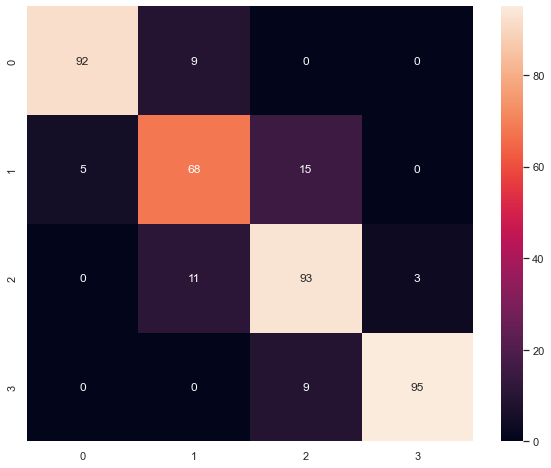

SVC() Accuracy score:  0.9475

SVC() Classification report:
               precision    recall  f1-score   support

           0   0.960784  0.970297  0.965517       101
           1   0.933333  0.954545  0.943820        88
           2   0.934579  0.934579  0.934579       107
           3   0.960396  0.932692  0.946341       104

    accuracy                       0.947500       400
   macro avg   0.947273  0.948029  0.947565       400
weighted avg   0.947634  0.947500  0.947482       400



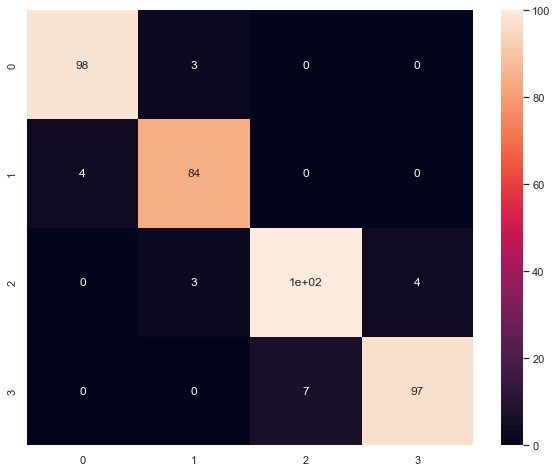

AdaBoostClassifier() Accuracy score:  0.5875

AdaBoostClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.977778  0.435644  0.602740       101
           1   0.496350  0.772727  0.604444        88
           2   0.500000  0.831776  0.624561       107
           3   0.850000  0.326923  0.472222       104

    accuracy                       0.587500       400
   macro avg   0.706032  0.591767  0.575992       400
weighted avg   0.710836  0.587500  0.575018       400



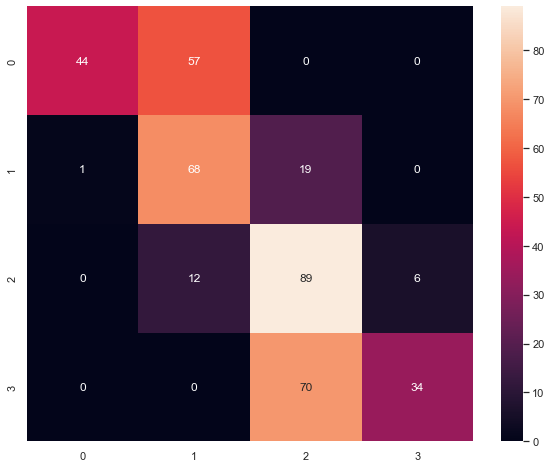

GradientBoostingClassifier() Accuracy score:  0.8925

GradientBoostingClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.969072  0.930693  0.949495       101
           1   0.815217  0.852273  0.833333        88
           2   0.824561  0.878505  0.850679       107
           3   0.969072  0.903846  0.935323       104

    accuracy                       0.892500       400
   macro avg   0.894481  0.891329  0.892208       400
weighted avg   0.896567  0.892500  0.893821       400



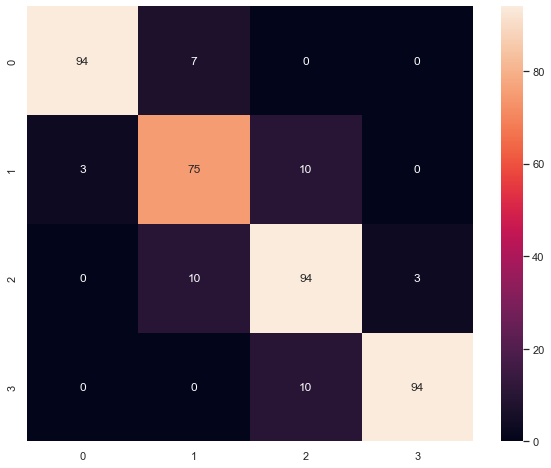

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Accuracy score:  0.655

LogisticRegression() Classification report:
               precision    recall  f1-score   support

           0   0.902174  0.821782  0.860104       101
           1   0.549451  0.568182  0.558659        88
           2   0.510204  0.467290  0.487805       107
           3   0.663866  0.759615  0.708520       104

    accuracy                       0.655000       400
   macro avg   0.656424  0.654217  0.653772       400
weighted avg   0.657763  0.655000  0.654784       400



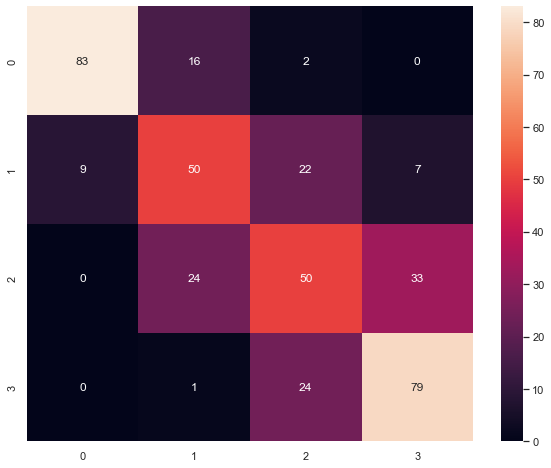

DecisionTreeClassifier() Accuracy score:  0.825

DecisionTreeClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.911765  0.920792  0.916256       101
           1   0.759036  0.715909  0.736842        88
           2   0.741071  0.775701  0.757991       107
           3   0.883495  0.875000  0.879227       104

    accuracy                       0.825000       400
   macro avg   0.823842  0.821851  0.822579       400
weighted avg   0.825154  0.825000  0.824822       400



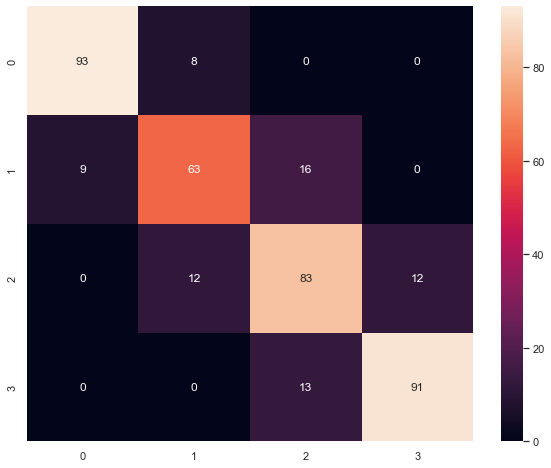

KNeighborsClassifier() Accuracy score:  0.925

KNeighborsClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.950980  0.960396  0.955665       101
           1   0.917647  0.886364  0.901734        88
           2   0.883929  0.925234  0.904110       107
           3   0.950495  0.923077  0.936585       104

    accuracy                       0.925000       400
   macro avg   0.925763  0.923768  0.924524       400
weighted avg   0.925585  0.925000  0.925048       400



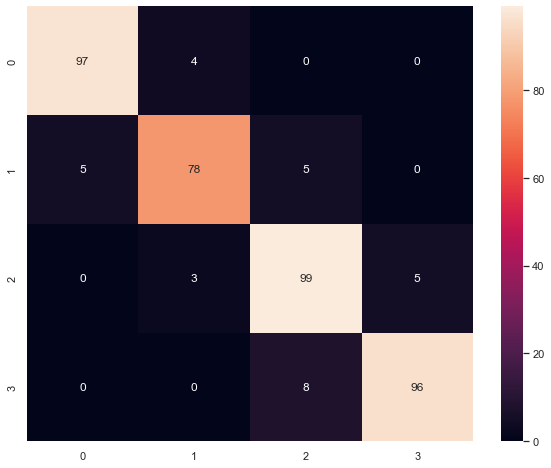

In [17]:
estimators = [
    RandomForestClassifier(),
    SVC(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

for esti in estimators:
    comp_esti(esti)

In [18]:
best_model = SVC()

best_model.fit(x_train,y_train)

SVC()

In [19]:
pred = best_model.predict(x_test)
accuracy_score(y_test,pred)

0.9475